# Phase Kickback

Phase kickback is a core technique that transfers information from the targeted qubit to the controlled qubit, enabling quantum algorithms to solve problems much faster than classical ones. One can often see this technique in quantum algorithms such as Deutsch-Josza, Simon's, Shor's, and Grover's algorithms, making it an important subroutine.

The phase kickback is done by applying a unitary operation $\hat{U}$ to a state with the relation $$ \hat{U}|\psi\rangle = e^{i\theta} |\psi\rangle$$. As we can see, the operation adds a global phase to the state, but does not change the state. 

We see the phase kickback circuit in the below, which uses the $T$-gate

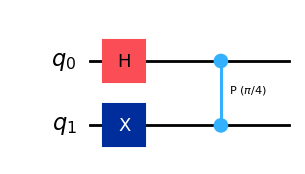

In [10]:
from qiskit_aer import Aer as Aer 
from qiskit import QuantumCircuit
from math import pi
from qiskit.visualization import plot_bloch_multivector

sim = Aer.get_backend('aer_simulator')

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4, 0, 1)
qc.draw("mpl")

#### The $T$-gate
>The phase kickback circuit uses the controlled $T$-gate, which the $T$-gate has a matrix of: 
$$T= \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}$$
which means its impact on a qubit is 
$$ T|0\rangle = |0\rangle $$
$$ T|1\rangle = e^{i\pi/4}|1\rangle $$
>The Controlled-T gate has a matrix of $$\text{Controlled-}T= \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\pi/4} \end{bmatrix}$$

Before the controlled-T gate is applied, the qubits are in the state $$|\psi\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle +|11\rangle\right) $$. 
When the controlled-T gate is applied with $q_0$ as the control, the state becomes 
$$ \begin{align}
\text{Controlled-}T |\psi\rangle &= \frac{1}{\sqrt{2}} \left(|01\rangle + e^{i\pi/4}|11\rangle\right)\\
&= \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i\pi/4} |1\rangle \right) \otimes |1\rangle
\end{align}
$$ 

Surprisingly, although $q_0$ act as the control of the controlled-T gate, it ends up changing while $q_1$ remains unchanged. Although when one measure $q_0$, the probability of it collapsing to $|0\rangle$ or $|1\rangle$ does not change, however it is shown to be very useful in Deutsch-Josza algorithm. 

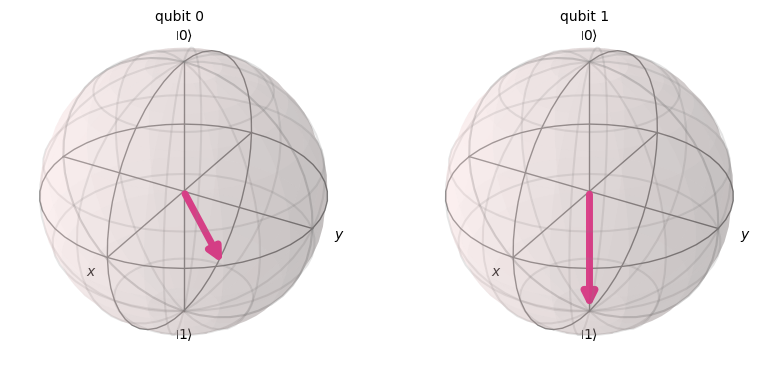

In [11]:
# Visualising the state post phase kickback
qc.save_statevector()
state = sim.run(qc).result().get_statevector() 
plot_bloch_multivector(state)